# Eliott YACHOUCHI, Min Han SOE

# Data Modeling

The aim of the lab is to put into practice the algorithms and concepts seen in the Data Modeling course. This notebook is provided as a standalone ressource to be run on Google Colab. <br>
You should be able to run it out of the box on a default Colab instance.

<hr>

## Assignment

In this notebook, you will find some helper functions along which <i>you</i> will have to write code to complete the assignment. You can write your analysis along the code in comments OR create a text cell (like this one) into which you may write your answers. The cells support HTML and Markdown language tags. <br>
Your code is expected to work, the <i>value</i> you provide and on which you are evaluated lies in the analysis: don't skip it.

The lab is split into two sections: Clustering and Regression. <br>
The first section corresponds to the first lesson and lab, the rest at a later date.

# Problem:
We are using the same dataset as the first lab, the nutrition information of the MacDonald's menu. From your previous conclusions, you have insights which will help validate these new techniques.   

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# Loading the dataset
mc_data = pd.read_csv("menu.csv")
print(mc_data.columns)
mc_data.head()

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


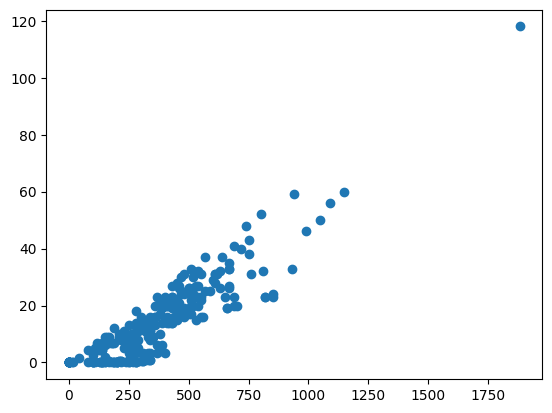

In [3]:
# Visualize your individuals
plt.scatter(mc_data[["Calories"]],mc_data[["Total Fat"]])
plt.show()

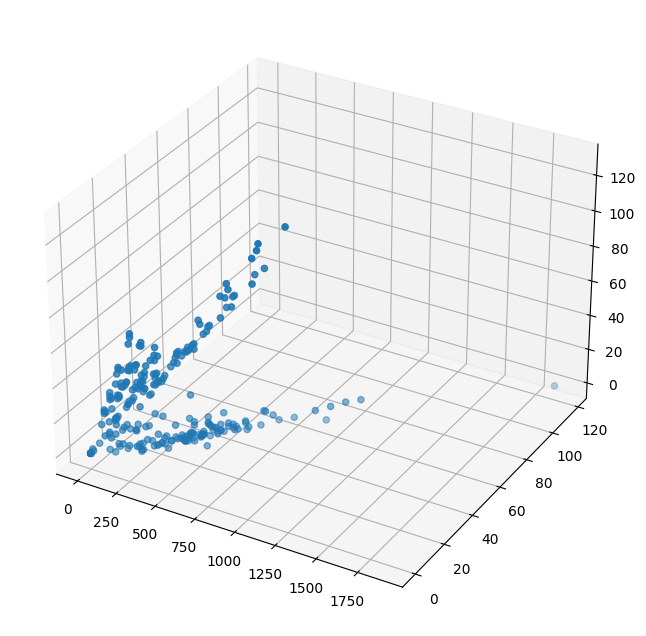

In [4]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(mc_data[["Calories"]],mc_data[["Total Fat"]],mc_data[["Sugars"]])
plt.show()

[]

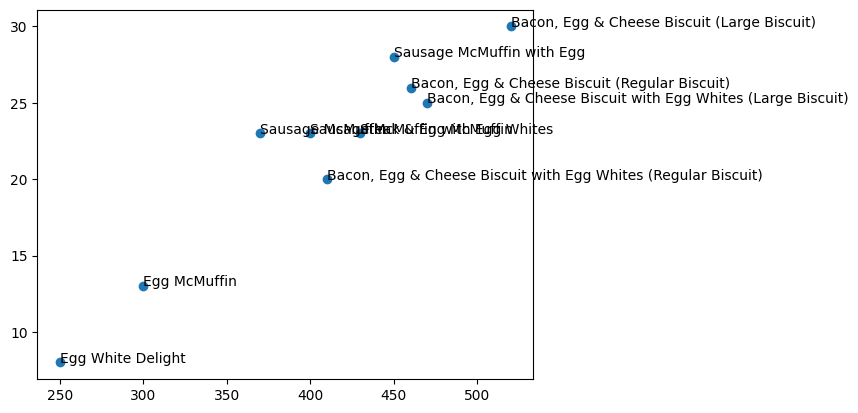

In [5]:
# Unlike R, python through matplotlib has no point naming function, you have to do it yourself
plt.scatter(mc_data[["Calories"]].head(10),mc_data[["Total Fat"]].head(10))
for i, name in enumerate(mc_data["Item"].head(10)):
  plt.annotate(name, (mc_data[["Calories","Total Fat"]].iloc[i]))
plt.plot()

# Exercise 1: Clustering

We want to group the different McItems by their characteristics. Using PCA we could already guess as to some groupings, knowing what they sell, we have some ideas how to separate the items into some groups. Can we verify this?


**Q1** : Build a Dendrogram from the sampled items, using the columns Calories, Total Fat and Sugars.
- Cluster the data using Ward linkage from scipy.
- Plot the partitions using dendrogram from scipy.

**Q2**: Label the items in the plot using the <i>labels</i> and <i>leaf_rotation</i> arguments.

**Q3**: Can you analyze why the items were grouped together? Is there a pattern?


In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

['Mocha (Large)', 'Hot Caramel Sundae', 'Ranch Snack Wrap (Grilled Chicken)', 'Fruit & Maple Oatmeal without Brown Sugar', "Fruit 'n Yogurt Parfait", 'Sausage, Egg & Cheese McGriddles', 'Hazelnut Latte (Small)', 'French Vanilla Latte (Medium)', 'Caramel Mocha (Large)', 'Buffalo Ranch McChicken']


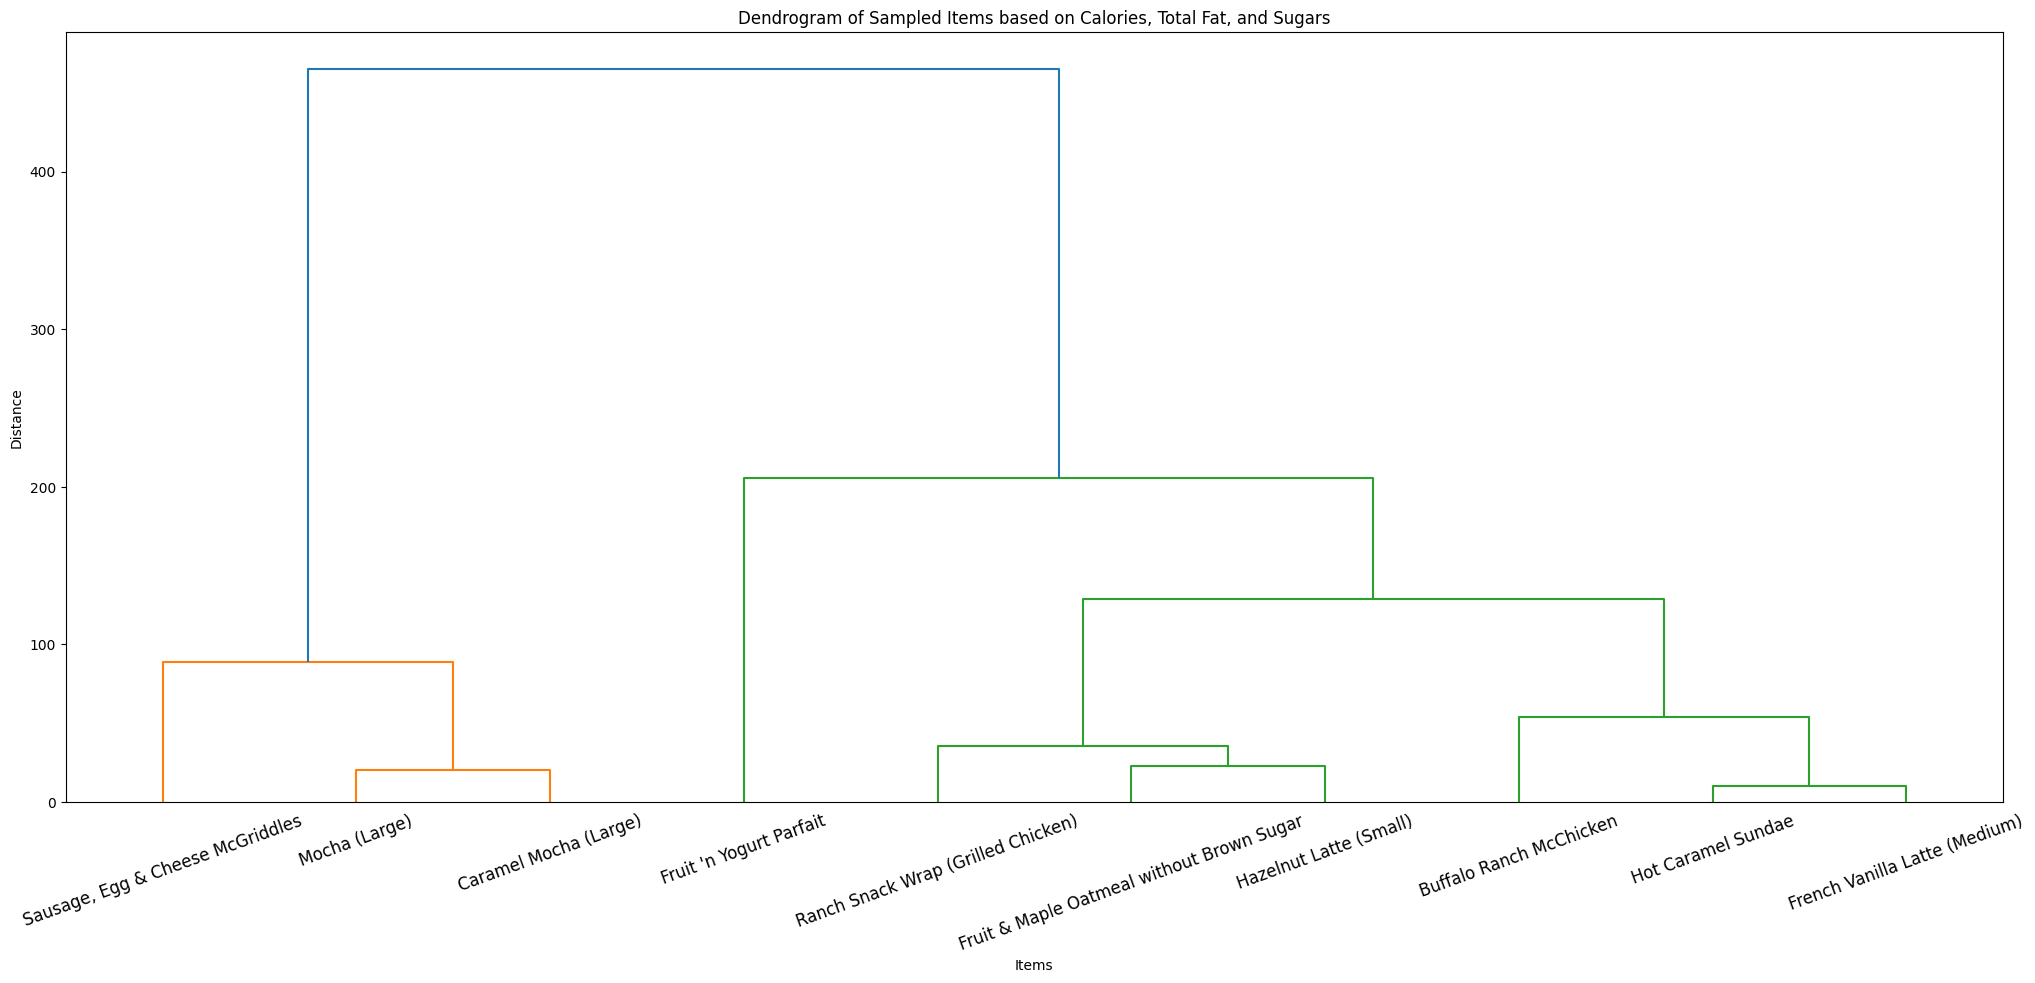

In [7]:
small_data = mc_data.sample(10, random_state=11)
labels = list(small_data["Item"])
print(labels)
subdata = small_data[["Calories", "Total Fat", "Sugars"]]
Z = linkage(subdata, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=labels, leaf_rotation=20)
plt.xlabel("Items")
plt.ylabel("Distance")
plt.title("Dendrogram of Sampled Items based on Calories, Total Fat, and Sugars")
plt.show()

### Q3: Can you analyze why the items were grouped together? Is there a pattern?
The items were grouped together based on the amount of calories, total fat and sugars. Similar items in calories are grouped together. We can see in the dendrogram that items like Mocha (large) and Caramel Mocha (large) are grouped together in a cluster because of their similarities. Another pattern we found in this small sample is that big calories item like Sausage, Egg & Cheese McGriddles and small calories item like Fruid'n Yogurt Parfait are split into a cluster of their own.

<hr>

**Q4**: Now build the dendrogram using the selected columns bellow.

**Q5**: Comment the partitions: How many clusters do you expect to select, why?

The dendrogram is filled with a bunch of clusters on the lower level but to get a clear view we go up a bit. We can expect to select 5 clusters because intuitively we can see that there are 5 major clusters in the dataset from looking at the dendrogram. We added a line to get a better visual on the dendrogram.

In [8]:
mc_data.shape

(260, 24)

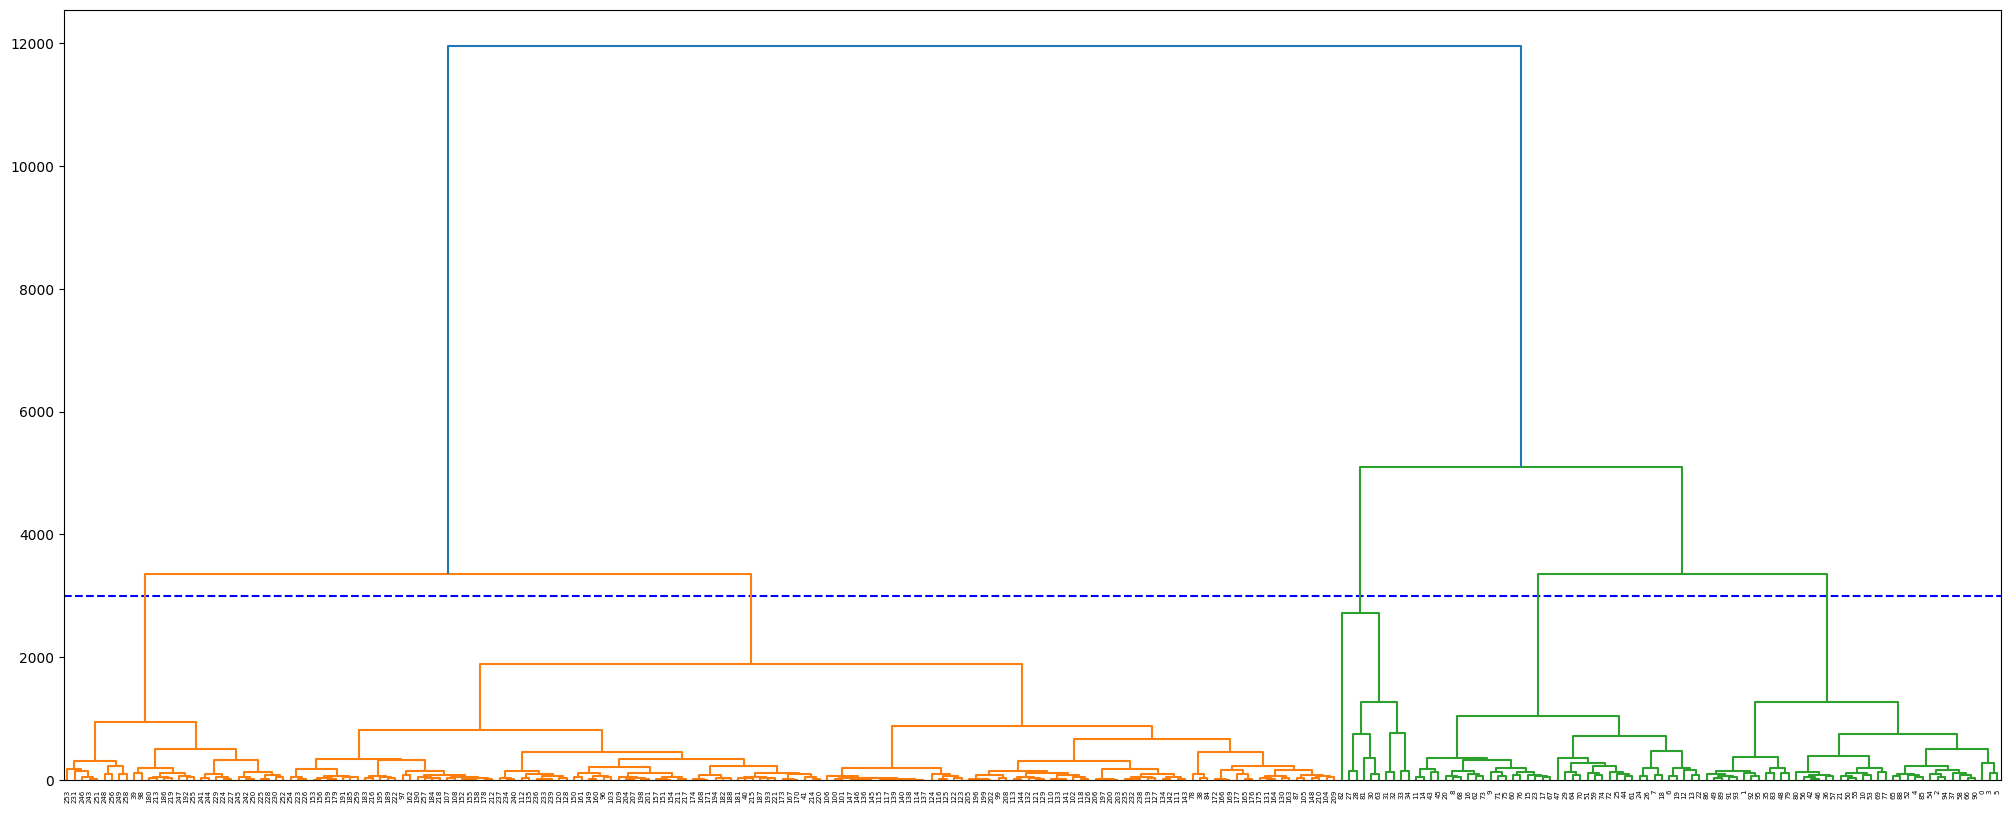

In [9]:
interesting_cols = ['Calories', 'Calories from Fat',
       'Total Fat', 'Saturated Fat', 'Trans Fat', 'Cholesterol',
       'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein'
       ]
subdata = mc_data[interesting_cols]
Z = linkage(subdata, method='ward', metric='euclidean')
fig = plt.figure(figsize=(25, 10))
plt.axhline(y = 3000, color = 'b', linestyle = '--')
dn = dendrogram(Z)

**Q6**: Compute the contribution from each new partition added.

**Q7**: Plot the contributions in a barplot.

**Q8**: From the plot, what value of K would you choose?

word linkage or inertia

In [10]:
from scipy.cluster.hierarchy import fcluster
import numpy as np

nb_clusters = 5

# Print the cluster name for each item sampled from small_data
groups = fcluster(Z, nb_clusters, criterion='maxclust')
print(groups)

# Get the points within a single cluster, here cluster 1
sampled_cluster = 1
groups = np.array(groups)
indexes = np.where(groups == sampled_cluster)
cluster_points = subdata.iloc[indexes]
cluster_points

[5 5 5 5 5 5 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 3 3 4 3 3 3 3 3 5 5
 5 2 1 2 2 5 4 4 4 5 4 5 5 5 4 5 5 5 5 5 5 5 4 4 4 4 3 4 5 5 4 4 5 4 4 4 4
 4 4 4 5 2 5 5 3 3 5 2 5 5 2 5 5 5 5 5 5 5 5 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2
 2 2 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1
 2]


,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
39,460,170,19.0,9.0,0.0,15,370,66,3,32,6
98,510,220,24.0,3.5,0.0,0,290,67,5,0,6
180,500,150,17.0,10.0,0.5,50,240,72,2,63,16
186,480,150,17.0,10.0,0.5,50,270,66,1,60,16
192,540,180,20.0,12.0,0.5,60,280,73,1,68,17
213,480,150,16.0,10.0,0.5,50,220,70,2,62,14
219,460,150,16.0,10.0,0.5,50,250,65,1,59,13
224,550,200,22.0,14.0,1.0,75,160,80,1,71,9
225,670,240,26.0,17.0,1.0,90,190,98,1,88,11
227,550,200,23.0,15.0,1.0,80,160,79,0,71,9


In [11]:
from numpy.linalg import norm 
avg_dists = []
# Sequentially, get the points within a cluster
for clust_nb in range(1,nb_clusters+1):
    indexes = np.where(groups == clust_nb)
    cluster_points = subdata.iloc[indexes]
    #print(len(cluster_points))
    nb_points = len(cluster_points)
    #Compute the centroid as the average member within a cluster
    centroid = np.mean(cluster_points)
    
    #compute cluster inertia
    sum_dist = norm(cluster_points - centroid)
    avg_dist = sum_dist / nb_points
    #print(avg_dist)
    avg_dists.append(avg_dist)
    
inertia = np.mean(avg_dists)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


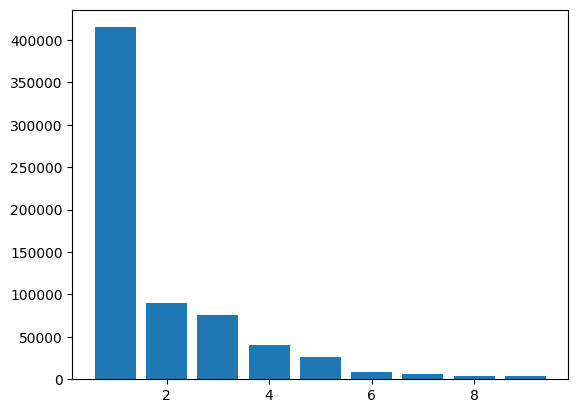

In [12]:
inertias = []
total_centroid = np.mean(subdata)

for max_clust in range(1,10):
    avg_dists = []
    inter_dists = []
    groups = fcluster(Z, max_clust, criterion='maxclust')
    for clust_nb in range(1, max_clust+1):
        indexes = np.where(groups == clust_nb)
        cluster_points = subdata.iloc[indexes]
        nb_points = len(cluster_points)
        
        centroid = np.mean(cluster_points)
        inter_dists.append(norm(centroid - total_centroid))
        
        sum_dist = norm(cluster_points - centroid)**2
        avg_dist = sum_dist / nb_points
        avg_dists.append(avg_dist)
    #Add together intra and inter inertia
    inertias.append(np.mean(avg_dists)/max_clust + np.mean(inter_dists)/max_clust)
    
plt.bar(range(1,10), inertias)
plt.show()

**Q8**: From the plot, what value of K would you choose?

Looking at the plot I would choose the K value of 5 because after that the inertia drop down exponentially.


<hr>

**Q9**: Compute the PCA of the total dataset, using the *interesting_cols* used beforehand.

**Q10**: Using the K you have selected, highlight the points by cluster, using different colors in the Plan(1,2) of the PCA.

**Q11**: **Optional** -- Are the selected clusters similar to the ones you guessed in the first part of the lab? Does the number of clusters match between k-means and AHC?

Yes, the selected clusters are similar to the ones we guessed in the first part of the lab. We choose 5 for both as answers so it match between k-means and AHC.

[5 5 5 5 5 5 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 3 3 4 3 3 3 3 3 5 5
 5 2 1 2 2 5 4 4 4 5 4 5 5 5 4 5 5 5 5 5 5 5 4 4 4 4 3 4 5 5 4 4 5 4 4 4 4
 4 4 4 5 2 5 5 3 3 5 2 5 5 2 5 5 5 5 5 5 5 5 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2
 2 2 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1
 2]


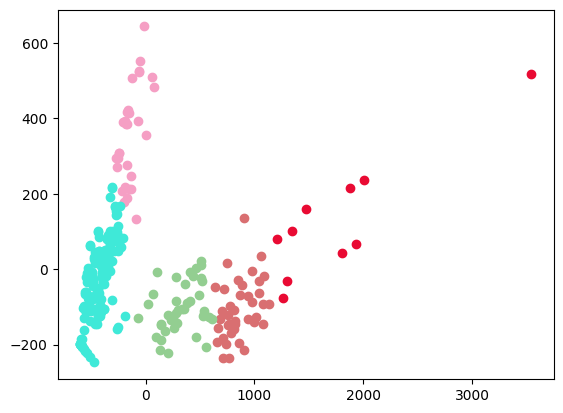

In [13]:
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster

nb_clusters = 5

# Print the cluster name for each item sampled from small_data
groups = fcluster(Z, nb_clusters, criterion='maxclust')
print(groups)

pca = PCA(n_components=2)
##Variance per Principal Component:
#pca.explained_variance_
pca_features = pca.fit_transform(subdata)
pca_df = pd.DataFrame(
  data=pca_features,
  columns=['PC1', 'PC2']
)
pca_df["target"] = groups

clusters = pca_df.groupby("target")

cluster_colors = ["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(6)]

for c_num, cluster in clusters:
    plt.plot(cluster["PC1"], cluster["PC2"], marker='o', linestyle='', color=cluster_colors[c_num])

"""
# The following code is provided as an indication of the process: does not run as standalone

pca_features = pca.fit_transform(<your data>)
pca_df = pd.DataFrame(
  data=pca_features,
  columns=['PC1', 'PC2']
)
pca_df["target"] = groups

clusters = pca_df.groupby("target")

cluster_colors = ["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(no_of_colors)]

for c_num, cluster in clusters:
  plt.plot(cluster["PC1"], cluster["PC2"], marker='o', linestyle='', color=cluster_colors[c_num])

""";

**Q12**: Compute the average member of each cluster (the centroids). Place them in the PCA Plan(1,2).

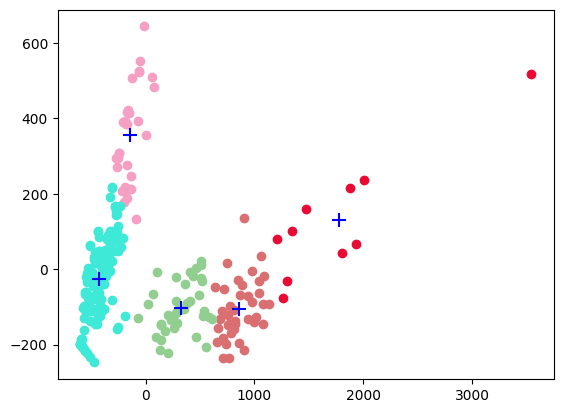

In [14]:
def calculate_centroid(df):
    return df.mean()

centroids=[]

for c_num, cluster in clusters:
    centroid = calculate_centroid(cluster)
    plt.scatter(centroid["PC1"], centroid["PC2"], marker ='+', color = 'blue', s=100)
    plt.plot(cluster["PC1"], cluster["PC2"], marker='o', linestyle='', color=cluster_colors[c_num], zorder = 0)
    centroids.append([centroid["PC1"], centroid["PC2"]])
    

**Q13**: Compute the intra inertia Iw for each cluster.

In [15]:
print(centroids)

[[-140.9632915338753, 355.2153146615245], [-425.8132065905097, -26.267700978594508], [1773.6554630066967, 131.23925357367165], [859.0648086975319, -106.31533184452434], [325.71196765018504, -102.97020489160438]]


In [16]:
centroids[0]

[-140.9632915338753, 355.2153146615245]

In [17]:
cluster1 = pca_df[pca_df["target"] == 1]

In [18]:
numpy_array_of_cluster1 = cluster1[['PC1', 'PC2']].to_numpy().tolist()

print(numpy_array_of_cluster1)

[[-84.60276274513548, 134.34722618495343], [-135.33971605390627, 213.34353638305632], [-194.0496543741726, 217.55074293088634], [-172.26942278316068, 188.43612045668579], [-138.24294880197397, 248.39444400075672], [-218.77812085079523, 206.6019503348949], [-197.0011279432081, 177.62042073597686], [-241.71407752854407, 306.96434420072103], [-168.52635876059432, 418.24792158465885], [-241.24158712159885, 307.3447054775631], [-166.2278089290138, 421.1262090428532], [-271.933780439207, 296.17170807829285], [-209.49578997549676, 390.88702462462436], [-123.92836171408645, 507.87170999445715], [-260.1672449206263, 271.66182568029706], [-176.4311522535559, 386.36852479539033], [-63.11918739713447, 523.6531434734547], [-252.41654132309662, 294.55856936348323], [-156.3775325311967, 415.07787251658027], [-54.27617990239377, 553.5657245026252], [-174.96819125435755, 275.34765646751595], [-69.63456941358491, 392.0952033828526], [56.869906661276914, 511.1130933036577], [-167.3287299070423, 384.54890

In [19]:
data_points_clusters = []
for i in range(1, 6):
    x = pca_df[pca_df["target"] == i]
    data_points_clusters.append(x[['PC1', 'PC2']].to_numpy().tolist())

In [44]:
intra_cluster_inertia = []
count = 0
for i in range(5):
    
    data_points_cluster_i = data_points_clusters[i]  # Replace this with your actual data
    centroid_C_i = np.array(centroids[i])  # Replace this with your actual centroid

    # Calculate the euclidean distances
    euclidean_distances = np.sqrt(np.sum((data_points_cluster_i - centroid_C_i) ** 2, axis=1))

    # Calculate the within-cluster inertia for cluster i
    within_cluster_inertia = np.sum(euclidean_distances)
    intra_cluster_inertia.append(within_cluster_inertia)
    count += 1

    print(f"Intra-Cluster Inertia for Cluster {count}: %.2f"%(within_cluster_inertia))

Intra-Cluster Inertia for Cluster 1: 4231.15
Intra-Cluster Inertia for Cluster 2: 18635.54
Intra-Cluster Inertia for Cluster 3: 4825.28
Intra-Cluster Inertia for Cluster 4: 5674.89
Intra-Cluster Inertia for Cluster 5: 6501.91




**Q14**: Compute the inter inertia Ib between cluster centroids.

In [65]:
inter_inertias = []
count = 0
num_clusters = len(centroids) 
inter_cluster_inertia = 0.0

for i in range(num_clusters):
    for j in range(i + 1, num_clusters):
        centroid_i = np.array(centroids[i])
        centroid_j = np.array(centroids[j])

        # Calculate the euclidean distance between centroids i and j
        euclidean_distances = np.sqrt(np.sum((centroid_i - centroid_j) ** 2))

        inter_cluster_inertia = euclidean_distances
    count += 1
    inter_inertias.append(inter_cluster_inertia)
    print(f"Inter-Cluster Inertia {count}: %.2f" % inter_cluster_inertia)

Inter-Cluster Inertia 1: 654.00
Inter-Cluster Inertia 2: 755.43
Inter-Cluster Inertia 3: 1466.76
Inter-Cluster Inertia 4: 533.36
Inter-Cluster Inertia 5: 533.36


<hr>





**Q15**: Using the mean and standard deviation of the intra and inter inertias, can you conclude on the quality of the partitioning?

In [46]:
np.mean(intra_cluster_inertia)

7973.753803350215

In [47]:
np.std(intra_cluster_inertia)

5385.997218136307

In [48]:
np.mean(inter_inertias)

788.5844101735441

In [49]:
np.std(inter_inertias)

349.11705534905474

+ Intra-Cluster Inertia:
    + Mean: 7973.75
    + Standard Deviation: 5385.997

A higher mean intra-cluster inertia suggests that, on average, the points within each cluster are relatively far from their cluster centroids. The standard deviation indicates the variability in the compactness of clusters.

+ Inter-Cluster Inertia:
    + Mean: 788.58
    + Standard Deviation: 349.117

A lower mean inter-cluster inertia is desirable, as it indicates that the centroids of different clusters are, on average, far from each other. The standard deviation gives a measure of the variability in the separation of clusters.

To conclude on the quality of the partitioning, we would assume it did a good job considering this is a relatively spread out datasets with extreme values on both tail ends.

<hr>

**Q16**: Apply the k-means algorithm for values of K ranging between 3 and 15.

**Q17**: Plot the intra-cluster inertia for each value of K.

**Q18**: How many clusters would you select? How does that compare to AHC's cluster numbers?


In [22]:
pcadf2 = pca_df.copy()

In [23]:
pcadf2 = pcadf2.drop('target', axis=1)

In [56]:
from sklearn.cluster import KMeans

intra_c_inertia = []
for k in range(3,16):
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(pcadf2)
    intra_c_inertia.append(km.inertia_)

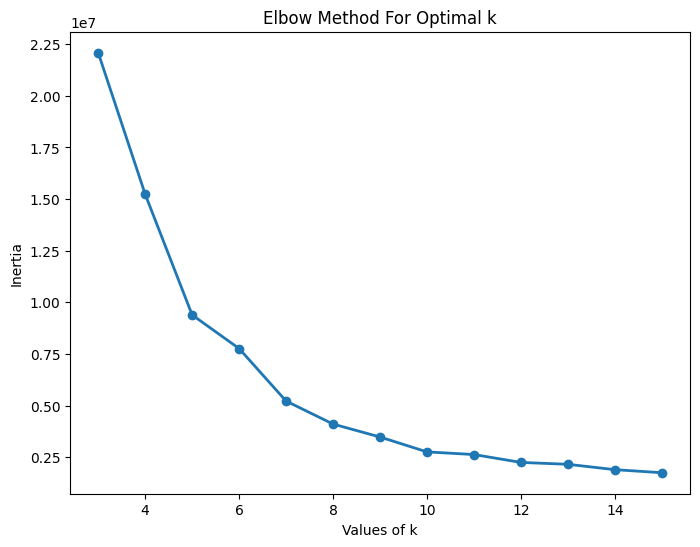

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(range(3,16), intra_c_inertia, marker='o', linewidth=2)
plt.xlabel('Values of k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

According to the elbow chart, we would select k value of 5. We would choose the elbow point to be 5 because after the k value of of 5 we can see inertia start to decrease slowly. If we compare to the AHC's cluster number we got the same number of k as well.

<hr>

**Q19**: Apply the silhouette method to determine the quality of your partition.
- For each point, compute its silhouette w.r.t its cluster.
- Compute the average silhouette within a cluster.
- Plot the silhouette values from each point.

**Q20**: Conclude on the quality of the partitioning based on the observations from the silhouette method.


Based on the silhouette scores, it seems that the clustering is most appropriate for a k value of 3, which has the highest average silhouette score of 0.66. However, we chose a k value of 5, which has the second highest average silhouette score of 0.55. Although it may not be the most well-defined clustering, it is still relatively acceptable based on the visualization of the clusters we have seen above.

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


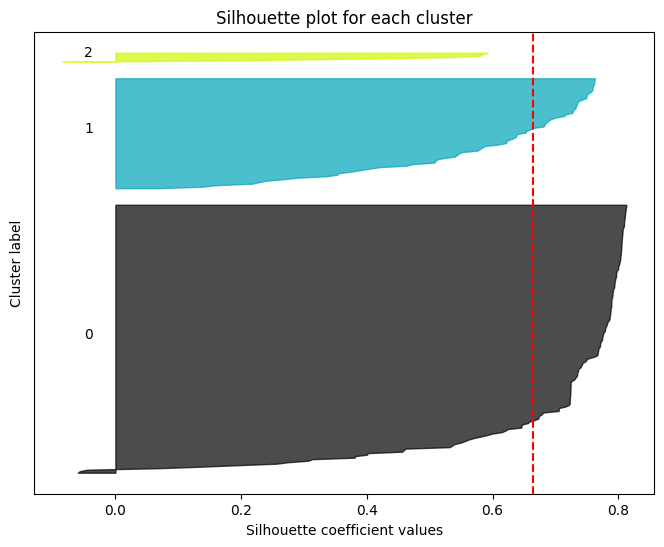

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Average Silhouette Score: 0.66


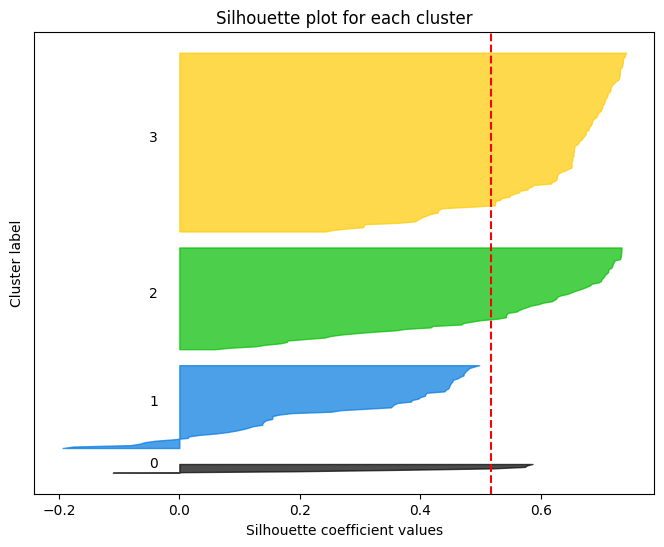

Average Silhouette Score: 0.52


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


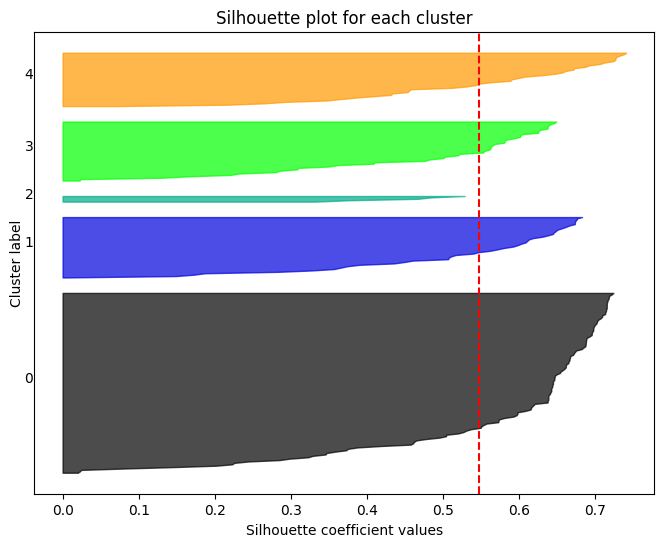

Average Silhouette Score: 0.55


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


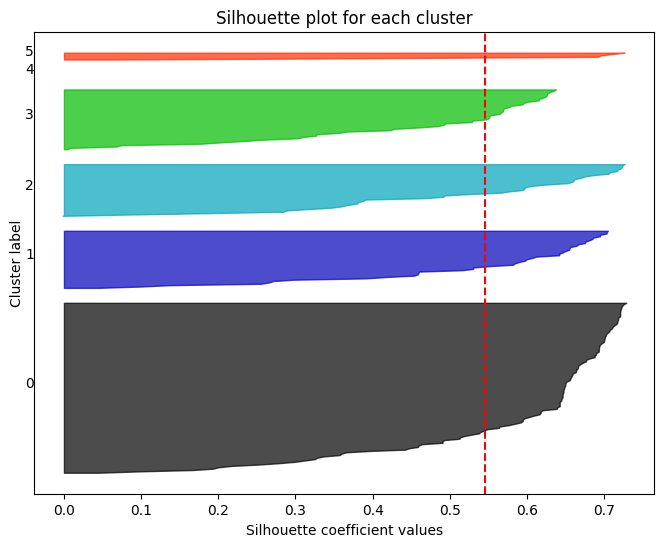

Average Silhouette Score: 0.55


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


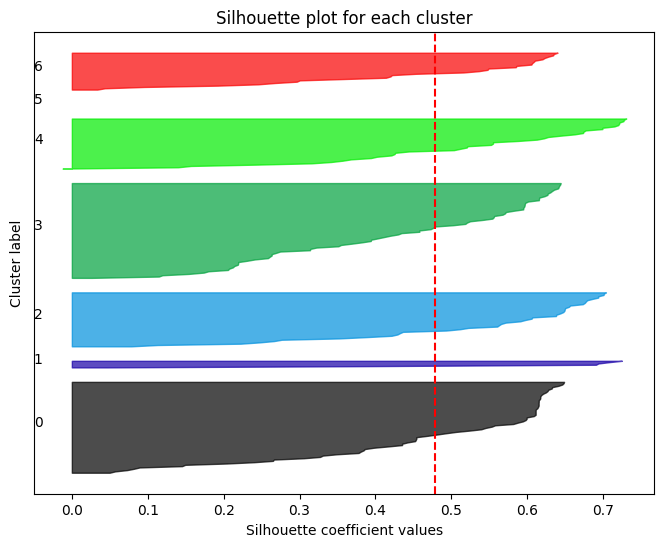

Average Silhouette Score: 0.48


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


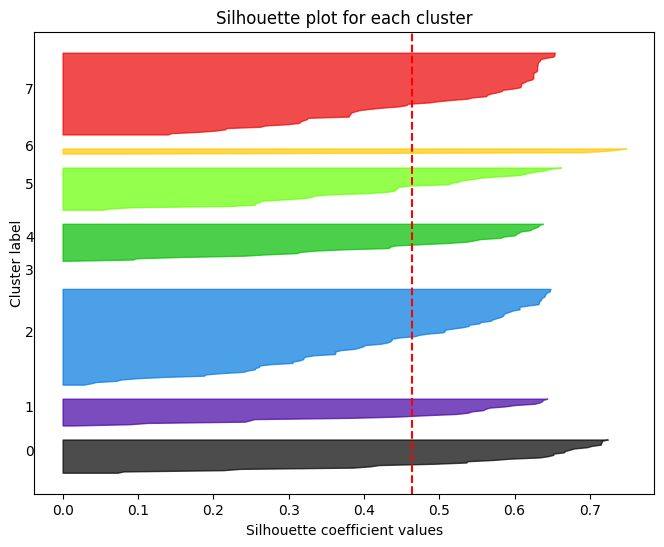

Average Silhouette Score: 0.46


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


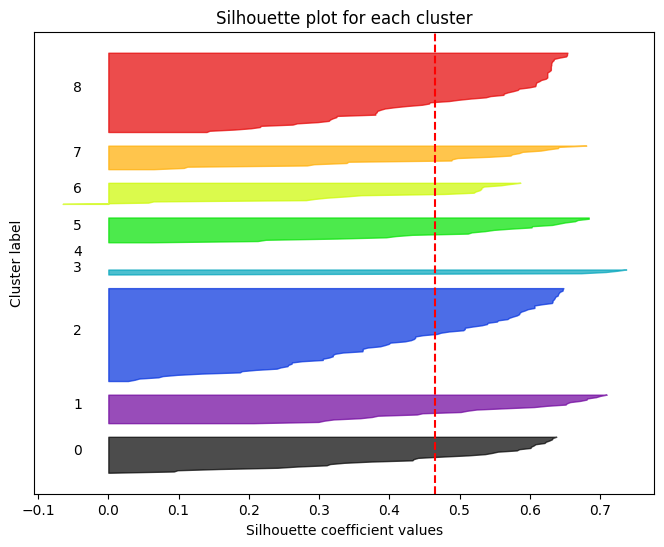

Average Silhouette Score: 0.46


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


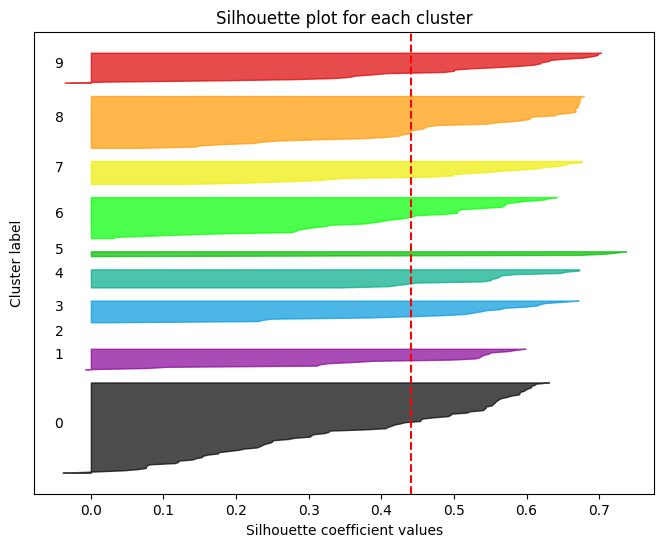

Average Silhouette Score: 0.44


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


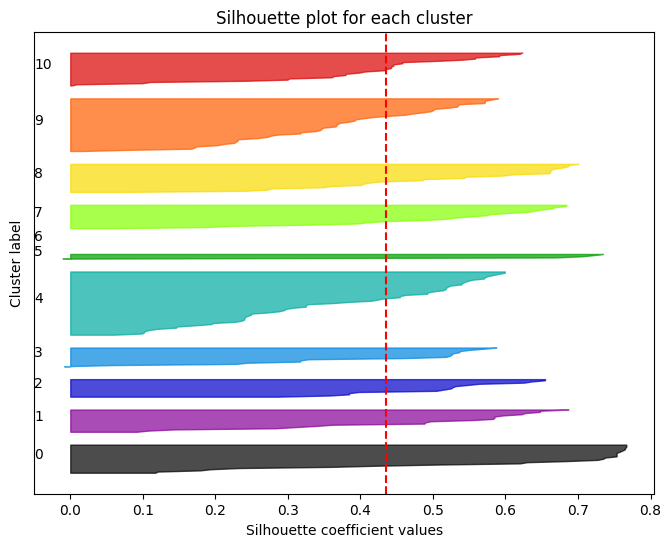

Average Silhouette Score: 0.44


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


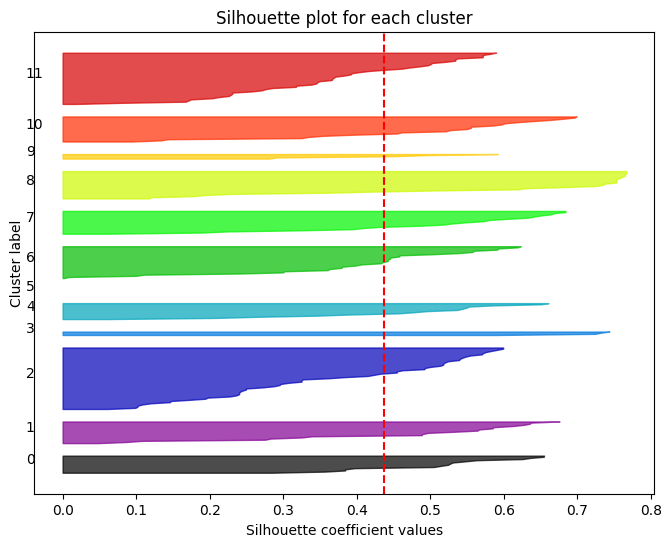

Average Silhouette Score: 0.44


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


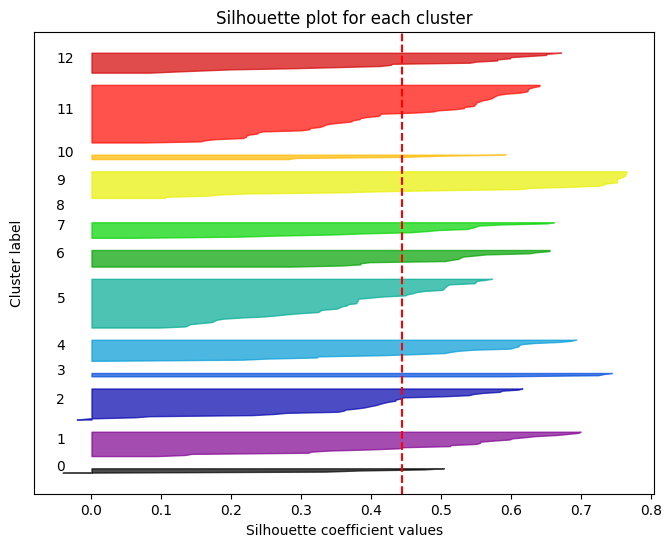

Average Silhouette Score: 0.44


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


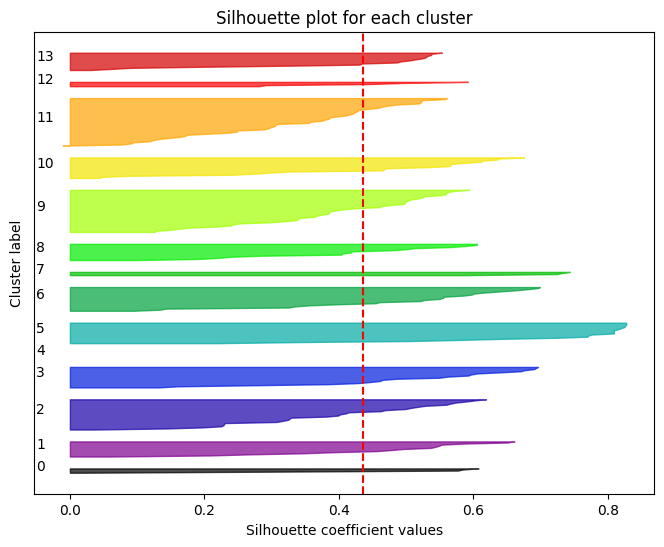

Average Silhouette Score: 0.44


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


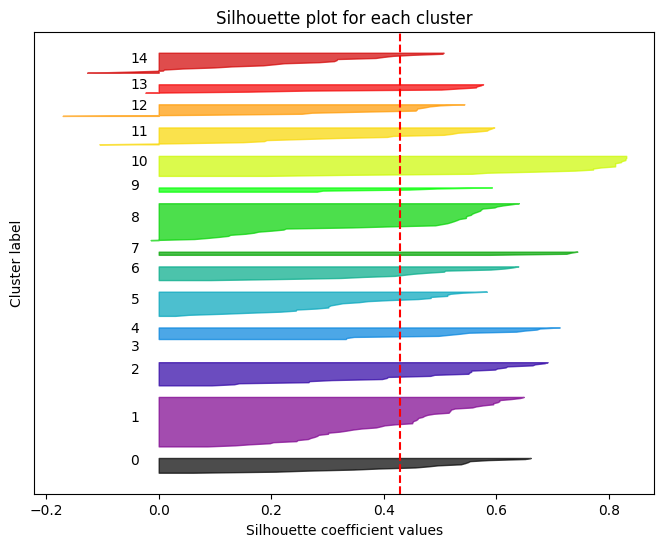

Average Silhouette Score: 0.43


In [27]:
for n_clusters in range(3, 16):  
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(pcadf2)

    # Compute silhouette scores for each data point
    silhouette_values = silhouette_samples(pcadf2, cluster_labels)

    # Compute the average silhouette score for the entire dataset
    average_silhouette_score = silhouette_score(pcadf2, cluster_labels)

    # Plot the silhouette values
    plt.figure(figsize=(8, 6))
    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        cluster_i_silhouette_values = silhouette_values[cluster_labels == i]
        cluster_i_silhouette_values.sort()

        size_cluster_i = cluster_i_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_i_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("Silhouette plot for each cluster")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=average_silhouette_score, color="red", linestyle="--")

    plt.yticks([])  # Clear the y-axis labels
    plt.show()

    print(f"Average Silhouette Score: {average_silhouette_score:.2f}")